## Tasca M7 T01

### Exercici 1
***
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('wineData.txt', header=None)

df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
              'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']

df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Les variables són les següents:

- **Class:** Tipus de vi.

- **Alcohol:** Contingut d'etanol del vi.

- **Malic acid:** Quantitat d'àcid màlic (contribueix a l'acidesa del vi).

- **Ash:** Quantitat de minerals presents en el vi.

- **Alcalinity of ash:** Nivell d'alcalinitat dels minerals.

- **Magnesium:** El magnesi és un mineral que pot influir en la percepció del sabor i la textura del vi.

- **Total phenols:** Contingut de fenols totals.

- **Flavanoids:** Quantitat de flavonoides (tipus de fenols) al vi.

- **Nonflavanoid phenols:** Contingut de fenols no flavonoides.

- **Proanthocyanins:** Contingut de proantocianidines (compostos fenòlics).

- **Color intensity:** Intensitat del color de la mostra.

- **Hue:** Matís del color del vi.

- **OD280/OD315** of diluted wines: És una mesura que indica la concentració de compostos fenòlics en el vi.

- **Proline:** quantitat de prolina al vi (aminoàcid que pot influir en la textura i el sabor).


Mirem la informació general sobre el dataset: valors nuls, tipus de dades, etc.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [5]:
df.isna().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

Mirem l'anàlisi estadístic i les correlacions entre les variables

In [7]:
df.describe().round(2)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


<Axes: >

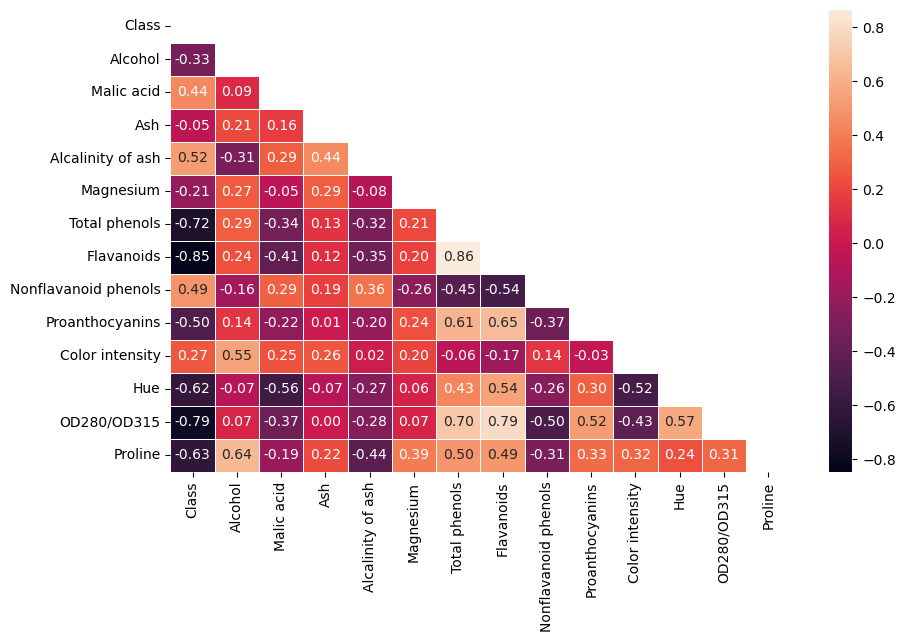

In [8]:
plt.figure(figsize=(10, 6))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.5, mask=mask)

Les correlacions més altes són les següents:

**1. Flavonoids i Total phenols (0.86)**:

- Flavanoids: Quantitat de flavonoides (tipus de fenols) al vi.
- Total phenols: Contingut de fenols totals.

Com més quantitat de flavonoides, trobem més fenols totals.

**2. OD280/OD315 i Flavonoids (0.79)**:

- OD280/OD315 of diluted wines: És una mesura que indica la concentració de compostos fenòlics en el vi.
- Flavanoids: Quantitat de flavonoides (tipus de fenols) al vi.

Com més flavonoides, més alt és OD280/OD315.

La resta de correlacions entre variables són baixes. 

Si ens fixem en l'atribut CLASS (la variable target) veiem que, en general, té una correlació bastant moderada amb les altres variables, excepte en els següents casos:


**1. Class i Flavonoids (-0.85)**:

- Class: Tipus de vi.
- Flavanoids: Quantitat de flavonoides (tipus de fenols) al vi.

La presència de flavonoides pot ser un indicador distintiu del tipus de vi.

**2. Class i OD280/OD315 (-0.79)**:

- Class: Tipus de vi.
- OD280/OD315 of diluted wines: És una mesura que indica la concentració de compostos fenòlics en el vi.

Diferents tipus de vins tendeixen a tenir concentracions diferents d'aquests compostos fenòlics.

**3. Class i Total phenols (-0.72)**:

- Class: Tipus de vi.
- Total phenols: Contingut de fenols totals.

El contingut de fenols totals podria ser un factor rellevant per classificar els tipus de vins.


Seguidament, continuem amb l'estudi de les variables visualment per veure si tenen outliers (boxplot):

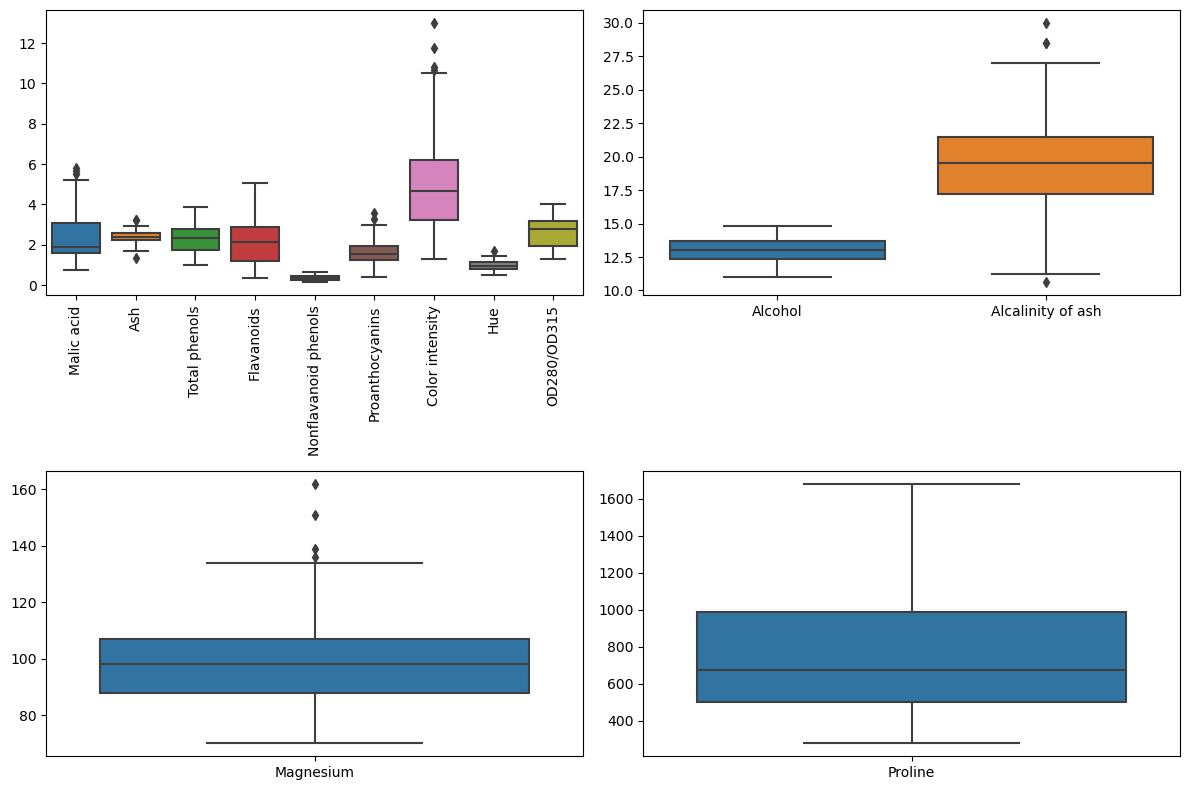

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.boxplot(data=df[['Malic acid', 'Ash', 'Total phenols', 'Flavanoids', 
                     'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315']], ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

sns.boxplot(data=df[['Alcohol', 'Alcalinity of ash']], ax=axes[0, 1])
sns.boxplot(data=df[['Magnesium']], ax=axes[1, 0])
sns.boxplot(data=df[['Proline']], ax=axes[1, 1])

plt.tight_layout()
plt.show()

Veiem que alguns atributs tenen outliers. Aixó ens servirà per a quan haguem d'estandartitzar.

### Train-test

Dividim el dataframe en diferents en els conjunts de train i test per predir a quin tipus de classe pertany un vi ('Class') basant-nos en les variables predictores.

In [10]:
# Train-test

df2 = df

X = df2.drop('Class', axis=1)
y = df2['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562
104,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
129,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750


Un cop tenim el dataset de train i test fet, ja podem incloure els models de machine learning que necessitem. En aquests casos utilitzarem models d'aprenentatge supervisat (aprèn de dades que ja estan etiquetades). Aquests models supervisats reben un conjunt de dades d'entrada i valors de sortida, on després, s'entrenen amb aquestes per aprendre a fer prediccions sobre dades no vistes.

### K-Nearest-Neighbors

**K-Nearest-Neighbors** (KNN) és un algoritme d'aprenentatge supervisat utilitzat per a problemes de classificació i regressió. És un algoritme no paramètric, és a dir, no assumeix cap distribució específica de les dades. Aquest algoritme no fa suposicions fortes sobre la distribució de les dades, la qual cosa el fa adequat per a una àmplia varietat de conjunts de dades.

In [11]:
# Crear el model KNN

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train) # Entrenar el model

y_pred_knn = knn.predict(X_test) # Prediccions

y_pred_knn

array([1, 3, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 3, 1, 3, 1, 2, 3, 1, 1, 3, 1, 2, 2, 3], dtype=int64)

In [12]:
accuracy = knn.score(X_test, y_test).round(3) # Avaluar el model

print(f'El model KNN encerta en el {accuracy* 100:.1f}% de les ocasions.')

El model KNN encerta en el 69.4% de les ocasions.


### Decision Tree Classifier

Un **arbre de decisió** (Decision Tree Classifier) és una estructura similar a un diagrama de flux on un node intern representa una característica (o atribut), la branca representa una regla de decisió i cada fulla representa el resultat.

El node més alt en un arbre de decisió es coneix com el node arrel i aprèn a fer particions basades en el valor de l'atribut, fent particions a l'arbre de manera recursiva (partició recursiva). Aquesta estructura ajuda en la presa de decisions i es visualitza com un diagrama de flux que imita fàcilment el pensament a nivell humà, per això, els arbres de decisió són fàcils d'entendre i interpretar.

In [13]:
# Crear el model DTC

dtc = DecisionTreeClassifier(random_state=3)

dtc.fit(X_train,y_train)  # Entrenar el model

y_pred_dtc = dtc.predict(X_test) # Prediccions

y_pred_dtc

array([3, 1, 1, 1, 2, 3, 1, 2, 1, 2, 2, 1, 3, 3, 1, 2, 1, 2, 2, 3, 2, 3,
       2, 3, 1, 3, 2, 2, 1, 3, 1, 2, 1, 2, 3, 2], dtype=int64)

In [14]:
accuracy_2 = dtc.score(X_test, y_test).round(3) # Avaluar el model

print(f'El model KNN encerta en el {accuracy_2* 100:.1f}% de les ocasions.')

El model KNN encerta en el 91.7% de les ocasions.


### Exercici 2
***
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

- **Matriu de confusió** (confusion matrix) revela com el model de classificació ha interpretat i classificat les diferents classes. Els valors fora de la diagonal principal indiquen errors de classificació, mentre que els valors dintre de la diagonal representen les prediccions correctes.
- **Accuracy** (exactitud) proporciona una visió general de quantes prediccions són correctes en comparació amb el total de prediccions.

### Matriu de confusió

In [15]:
# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print('Matriu de Confusió - KNN:')
print(cm_knn)

# DTC
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print('\nMatriu de Confusió - DTC:')
print(cm_dtc)


Matriu de Confusió - KNN:
[[10  0  0]
 [ 2  9  2]
 [ 3  4  6]]

Matriu de Confusió - DTC:
[[10  0  0]
 [ 0 13  0]
 [ 2  1 10]]


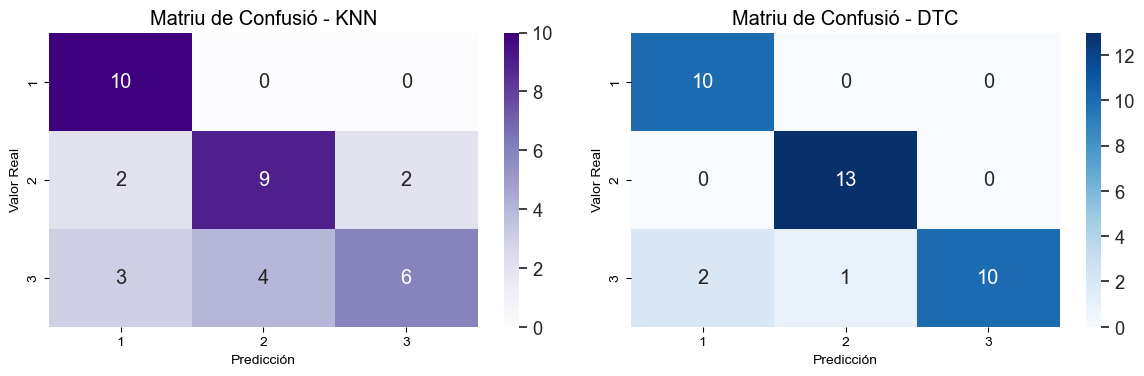

In [16]:
# Visualització de la matriu de confusió

names = df['Class'].unique()

# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# KNN
sns.set(font_scale=1.2) 
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Purples", xticklabels=names, yticklabels=names, ax=axs[0])
axs[0].set_xlabel('Predicción')
axs[0].set_ylabel('Valor Real')
axs[0].set_title('Matriu de Confusió - KNN')

# DTC
sns.set(font_scale=1.2) 
sns.heatmap(cm_dtc, annot=True, fmt="d", cmap="Blues", xticklabels=names, yticklabels=names, ax=axs[1])
axs[1].set_xlabel('Predicción')
axs[1].set_ylabel('Valor Real')
axs[1].set_title('Matriu de Confusió - DTC')


plt.tight_layout()
plt.show()

**Matriu de Confusió - KNN:**

- Classe 1 (Primera fila): 10 es van classificar correctament com a classe 1.
- Classe 2 (Segona fila): 9 de la classe 2 es van classificar correctament, però va haver-hi 2 falsos negatius i 2 falsos positius.
- Classe 3 (Tercera fila): 6 de la classe 3 es van classificar correctament, però va haver-hi 3 falsos negatius i 4 falsos positius.

**Matriu de Confusió - DTC:**

- Classe 1 (Primera fila): 10 es van classificar correctament com a classe 1.
- Classe 2 (Segona fila): Totes les 13 instàncies de la classe 2 es van classificar correctament.
- Classe 3 (Tercera fila): 10 de la classe 3 es van classificar correctament, però va haver-hi 2 falsos negatius i 1 fals positiu.

### Accuracy

In [17]:
# KNN

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy - KNN: {accuracy_knn* 100:.2f}%')

# DTC

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f'Accuracy - DTC: {accuracy_dtc* 100:.2f}%')

Accuracy - KNN: 69.44%
Accuracy - DTC: 91.67%


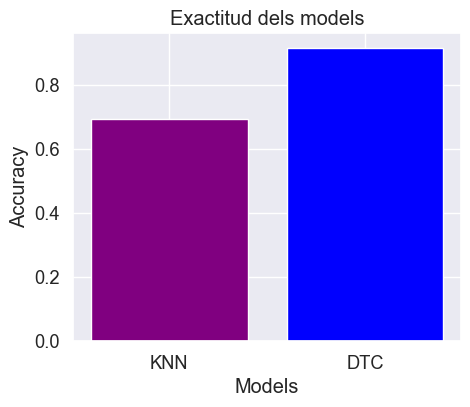

In [18]:
accuracies = [accuracy_knn, accuracy_dtc]
model_names = ['KNN', 'DTC']

plt.figure(figsize=(5, 4))

plt.bar(model_names, accuracies, color=['purple', 'blue'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Exactitud dels models")

plt.show()

El model K-Nearest-Neighbors (KNN) té una exactitud del 69%, és a dir, el 69% de les prediccions són correctes en el conjunt de prova. Per altra banda, el model Decision Tree Classifier (DTC), té un 92% de les prediccions correctes. Així doncs, podem considerar que DTC té una major exactitud en comparació amb el model KNN en aquest conjunt de dades.

En termes generals, un model amb una exactitud més alta és preferible, però és important considerar altres mètriques. Els termes "precision", "recall" i "f1-score" son mètriques d'avaluació de models de classificació que s'utilitzen per a avaluar el rendiment d'un model en problemes de classificació, on s'intenta predir la classe a la qual pertanyen els elements d'un conjunt de dades.

- **Precision**: mesura l'exactitud de les prediccions positives (proporció d'instàncies positives que van ser correctament classificades respecte a totes les classificades com a positives).
- **Recall**: mesura la capacitat del model per a capturar totes les instàncies positives (proporció d'instàncies positives que van ser correctament classificades respecte a totes les instàncies que són realment positives.
- **F1-score** és la mitjana harmònica de 'precision' i 'recall'. F1-score té un valor més alt quan 'precision' i 'recall' són alts i similars (és especialment útil quan hi ha un desequilibri entre les classes).

In [19]:
# Informe de Classificació
report_knn = classification_report(y_test, y_pred_knn)

print('Informe de Classificació - KNN:')
print(report_knn)

report_dtc = classification_report(y_test, y_pred_dtc)

print('\nInforme de Classificació - DTC:')
print(report_dtc)

Informe de Classificació - KNN:
              precision    recall  f1-score   support

           1       0.67      1.00      0.80        10
           2       0.69      0.69      0.69        13
           3       0.75      0.46      0.57        13

    accuracy                           0.69        36
   macro avg       0.70      0.72      0.69        36
weighted avg       0.71      0.69      0.68        36


Informe de Classificació - DTC:
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       0.93      1.00      0.96        13
           3       1.00      0.77      0.87        13

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.91        36
weighted avg       0.93      0.92      0.91        36



En comparació amb KNN, DTC té resultats més alts en totes les mètriques, incloent-hi precisió, recall i F1-score. DTC té una precisió global del 92%, indicant un millor rendiment que KNN, que en té del 69%. DTC mostra un bon equilibri entre precision i recall per a totes les classes, mentre que KNN té algunes limitacions, especialment a la classe 3. Segons aquest informe de classificació, DTC supera a KNN en termes de rendiment.

### Exercici 3
***
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

#### K-Nearest-Neighbors (KNN)

In [20]:
# Paràmetres KNN

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [45]:
# Definició els paràmetres per a KNN
param_grid = {'n_neighbors': [3, 5, 7, 9],         
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Entrena el model amb les diferents combinacions de paràmetres
grid_search.fit(X_train, y_train)

# Trobar les millors combinacions de paràmetres
best_param = grid_search.best_params_

# Obtenir el model amb els millors paràmetres
best_knn = grid_search.best_estimator_

# Avaluar el model amb les dades de prova
y_pred_knn2 = best_knn.predict(X_test)

accuracy_knn2 = accuracy_score(y_test, y_pred_knn2)

print ('Model KNN')
print(f'Millors paràmetres: {best_params}')
print(f'Accuracy: {accuracy_knn2:.1%}')

Model KNN
Millors paràmetres: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy: 83.3%


Després d'optimitzar el model KNN amb els millors paràmetres, ha demostrat un alt nivell de precisió amb una taxa d'exactitud del 83.3%. Si ho comparem amb el model sense optimitzar (precisió del 69.4%), veiem que ha millorat considerablement la seva predicció.

#### Decision Tree Classifier (DTC)

In [23]:
# Paràmetres DTC

dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 3,
 'splitter': 'best'}

In [46]:
# Definició els paràmetres per a DTC
param_grid = {'criterion': ['gini', 'entropy'],      
              'max_depth': [None, 10, 20, 30, 40],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# GridSearchCV
dtc = DecisionTreeClassifier()
grid_search2 = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')

# Entrena el model amb les diferents combinacions de paràmetres
grid_search2.fit(X_train, y_train)

# Trobar les millors combinacions de paràmetres
best_params2 = grid_search2.best_params_

# Obtenir el model amb els millors paràmetres
best_dtc = grid_search2.best_estimator_

# Avaluar el model amb les dades de prova
y_pred_dtc2 = best_dtc.predict(X_test)

accuracy_dtc2 = accuracy_score(y_test, y_pred_dtc2)

print ('Model DTC')
print(f'Millors paràmetres: {best_params2}')
print(f'Accuracy: {accuracy_dtc2:.1%}')

Model DTC
Millors paràmetres: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 100.0%


Un 'accuracy' del 100% suggereix que el model està fent prediccions correctes en tots els casos. Encara que el model mostra un rendiment sòlid, és important considerar la possibilitat de sobreajust o biaix en el conjunt de dades. Aquest resultats poden ser deguts als següents casos:

- Overfitting: el model s'ha ajustat massa a les dades d'entrenament i ha capturat el soroll en lloc de patrons genuïns. Aquest sobreajust pot portar a un rendiment deficient en dades no vistes.

- Paràmetres Optimitzats: poden haver millorat significativament el rendiment.

Validar el model en un conjunt de prova independent és essencial per a avaluar la seva capacitat de generalització.

### Exercici 4
***
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [47]:
# Crear el model
model_knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=2)

# Cross-validation
scores_knn = cross_val_score(model_knn, X, y, cv=5, scoring='accuracy').round(3)

# Resultats per cada fold
print('Model KNN')
print('Accuracy:', scores_knn)

# Calcular la mitjana
accuracy_mean = scores_knn.mean().round(3)
accuracy_std = scores_knn.std().round(3)

print('Mitjana Accuracy:', accuracy_mean)
print('Desviació estàndard Accuracy:', accuracy_std)


# Crear el model
model_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=20,  min_samples_split=2, min_samples_leaf=1)

# Cross-validation
scores_dtc = cross_val_score(model_dtc, X, y, cv=5, scoring='accuracy').round(3)

# Resultats per cada fold
print('\nModel DTC')
print('Accuracy:', scores_knn)

# Calcular la mitjana
accuracy_mean_dtc = scores_dtc.mean().round(3)
accuracy_std_dtc = scores_dtc.std().round(3)

print('Mitjana Accuracy:', accuracy_mean_dtc)
print('Desviació estàndard Accuracy:', accuracy_std_dtc)

Model KNN
Accuracy: [0.639 0.694 0.667 0.657 0.857]
Mitjana Accuracy: 0.703
Desviació estàndard Accuracy: 0.079

Model DTC
Accuracy: [0.639 0.694 0.667 0.657 0.857]
Mitjana Accuracy: 0.899
Desviació estàndard Accuracy: 0.038


- **KNN:** Encara que els millors paràmetres indicaven un 'accuracy' del 83.3%, el rendiment en la validació creuada és més baix. Això suggereix que el model KNN amb aquests paràmetres pot no generalitzar tan bé com s'esperava en noves dades. També pot indicar que el model no era competament precís (podría ser degut a una quantitat insuficient de dades o a la multicolinealitat).

- **DTC:** Té millors paràmetres i mostra un 'accuracy' inicial del 100.0%. Tot i que ha disminuït, el rendiment es manté alt en la cross-validation, amb una mitjana del 89.9%. Això indica que el model DTC amb els nous paràmetres també generalitza bé i és més robust que el model KNN en aquest conjunt de dades i configuració. Tot i això, també pot indicar que el model no era completament precís com en l'altre cas.

La desviació estàndard en tots dos casos continua sent relativament baixa, indicant consistència en el rendiment entre els diferents 'folds' de la cross-validation.

En general, el model DTC sembla ser més robust i generalitzar millor que el model KNN en aquest cas específic. La selecció de paràmetres millorada per al model DTC sembla haver tingut un impacte positiu en el seu rendiment.

### Exercici 5
***
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)